### 205229118
### Mahalakshmi S

### SMA Lab2. Real time crawling of tweets from Twitter (Part 2)

### 1. Install and import twitter library 

In [2]:
import twitter
import json

### 2. Signup your twitter developer account and obtain the following credentials
###  consumer_key = “…”
###  consumer_secret = “ … “
###  access_token = “ … “
###  access_secret = “ … “ 

In [3]:
CONSUMER_KEY = '1wRdKfNEIeuH9stbZIfB6zTnj'
CONSUMER_SECRET = 'C2tGdXLsyvUxK6jSojceLnKptmKhF7nhE74JfTrQaNxguemEXJ'
OAUTH_TOKEN = '1426417914756825088-9IgvrDKl2mXIlGzQ70yd8YmBZ2xJSo'
OAUTH_TOKEN_SECRET = 'Ps1zi6VdqzRH0XjjY86oPPker22KgdutKmVQQ5cQ3B6M0'

### 3. Write code for crawling real time data from Twitter Streaming API.

In [4]:
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)
print(twitter_api)

### 4. Crawl tweets using hashtags of your own

In [5]:
q='#Mi11XPro'
count = 10
from urllib.parse import unquote
search_results = twitter_api.search.tweets(q=q, count=count)
statusess = search_results['statuses']
print(search_results)

{'statuses': [{'created_at': 'Fri Aug 20 15:02:46 +0000 2021', 'id': 1428734259645214720, 'id_str': '1428734259645214720', 'text': '👉 Amazon Youth Edition Spin and Win Quiz Contest Answers\n\n👉 https://t.co/ppaDYjTIMK\n\n#BitsCraze #AmazonQuiz… https://t.co/QaN9r4nh0b', 'truncated': True, 'entities': {'hashtags': [{'text': 'BitsCraze', 'indices': [85, 95]}, {'text': 'AmazonQuiz', 'indices': [96, 107]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ppaDYjTIMK', 'expanded_url': 'http://bitscraze.blogspot.com/2021/08/amazon-youth-edition-spin-and-win-quiz.html', 'display_url': 'bitscraze.blogspot.com/2021/08/amazon…', 'indices': [60, 83]}, {'url': 'https://t.co/QaN9r4nh0b', 'expanded_url': 'https://twitter.com/i/web/status/1428734259645214720', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [109, 132]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Andr

In [9]:
print(json.dumps(statusess[0], indent=1))

{
 "created_at": "Fri Aug 20 15:02:46 +0000 2021",
 "id": 1428734259645214720,
 "id_str": "1428734259645214720",
 "text": "\ud83d\udc49 Amazon Youth Edition Spin and Win Quiz Contest Answers\n\n\ud83d\udc49 https://t.co/ppaDYjTIMK\n\n#BitsCraze #AmazonQuiz\u2026 https://t.co/QaN9r4nh0b",
 "truncated": true,
 "entities": {
  "hashtags": [
   {
    "text": "BitsCraze",
    "indices": [
     85,
     95
    ]
   },
   {
    "text": "AmazonQuiz",
    "indices": [
     96,
     107
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [],
  "urls": [
   {
    "url": "https://t.co/ppaDYjTIMK",
    "expanded_url": "http://bitscraze.blogspot.com/2021/08/amazon-youth-edition-spin-and-win-quiz.html",
    "display_url": "bitscraze.blogspot.com/2021/08/amazon\u2026",
    "indices": [
     60,
     83
    ]
   },
   {
    "url": "https://t.co/QaN9r4nh0b",
    "expanded_url": "https://twitter.com/i/web/status/1428734259645214720",
    "display_url": "twitter.com/i/web/status/1\u2026",
    "indices": [

### 5. Extract text, screen names and hashtags from tweets

In [13]:
status_texts = [ status['text'] 
                 for status in statusess ]

screen_names = [ user_mention['screen_name'] 
                 for status in statusess
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statusess
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "\ud83d\udc49 Amazon Youth Edition Spin and Win Quiz Contest Answers\n\n\ud83d\udc49 https://t.co/ppaDYjTIMK\n\n#BitsCraze #AmazonQuiz\u2026 https://t.co/QaN9r4nh0b",
 "\ud83d\udc49 Amazon Mi Band 6 Quiz Contest Answers\n\n\ud83d\udc49 https://t.co/XJAURfN1D8\n\n#AmazonSpecials #TheFuturelsSmartFitness\u2026 https://t.co/Bf5Ycg39I0",
 "@XiaomiIndia Ans 2 - Option (C) and  (D) are right answer because Mi11X has Qualcomm \u00aeAdreno\u2122650 GPU but Mi11XPro h\u2026 https://t.co/M0fZ03tS5m",
 "@XiaomiIndia Ans 4 - Option (A) is right answer  #MidWeekMiQuiz, #Mi11X, #Mi11XPro &amp; #Mi11XSeries",
 "@XiaomiIndia Ans 3 - Option (A) is right answer  #MidWeekMiQuiz, #Mi11X, #Mi11XPro &amp; #Mi11XSeries"
]
[
 "XiaomiIndia",
 "XiaomiIndia",
 "XiaomiIndia",
 "XiaomiIndia",
 "XiaomiIndia"
]
[
 "BitsCraze",
 "AmazonQuiz",
 "AmazonSpecials",
 "TheFuturelsSmartFitness",
 "MidWeekMiQuiz"
]
[
 "\ud83d\udc49",
 "Amazon",
 "Youth",
 "Edition",
 "Spin"
]


### 6. Create a frequency distribution from the words of the tweets

In [14]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('answer', 7), ('#Mi11XSeries', 7), ('@XiaomiIndia', 6), ('#MidWeekMiQuiz,', 6), ('#Mi11X,', 6), ('and', 5), ('Ans', 5), ('-', 5), ('Option', 5), ('right', 5)]

[('XiaomiIndia', 8)]

[('MidWeekMiQuiz', 7), ('Mi11XSeries', 7), ('Mi11X', 6), ('Mi11XPro', 6), ('BitsCraze', 1), ('AmazonQuiz', 1), ('AmazonSpecials', 1), ('TheFuturelsSmartFitness', 1), ('mi11x', 1), ('mi11xpro', 1)]



### 7. Using prettytable library, print the above frequency distribution in the form of a table

In [17]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-----------------+-------+
| Word            | Count |
+-----------------+-------+
| answer          |     7 |
| #Mi11XSeries    |     7 |
| @XiaomiIndia    |     6 |
| #MidWeekMiQuiz, |     6 |
| #Mi11X,         |     6 |
| and             |     5 |
| Ans             |     5 |
| -               |     5 |
| Option          |     5 |
| right           |     5 |
+-----------------+-------+
+-------------+-------+
| Screen Name | Count |
+-------------+-------+
| XiaomiIndia |     8 |
+-------------+-------+
+-------------------------+-------+
| Hashtag                 | Count |
+-------------------------+-------+
| MidWeekMiQuiz           |     7 |
| Mi11XSeries             |     7 |
| Mi11X                   |     6 |
| Mi11XPro                |     6 |
| BitsCraze               |     1 |
| AmazonQuiz              |     1 |
| AmazonSpecials          |     1 |
| TheFuturelsSmartFitness |     1 |
| mi11x                   |     1 |
| mi11xpro                |     1 |
+-------------------

### 8. Generate histograms of words, screen names and hastags

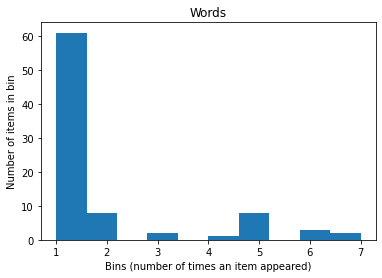

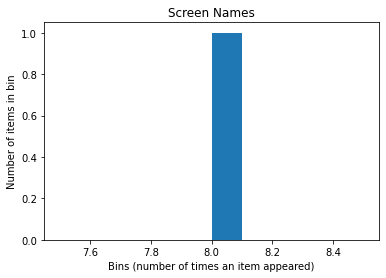

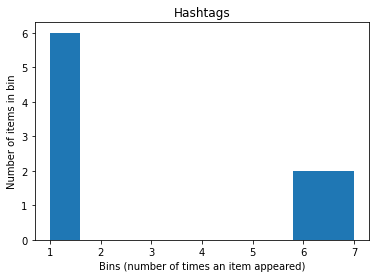

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    c = Counter(data)    # Build a frequency map for each set of data
    plt.hist(list(c.values()))   # and plot the values
    
     
    plt.title(label)   # Add a title and y-label
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    plt.figure()   # ... and display as a new figure